In [ ]:
!pip install torch torchvision
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import tensorflow as tf
import skimage
import matplotlib.pyplot as plt
import random

import shutil
from torchsummary import summary
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import numpy as np
import pandas as pd
import os
from PIL import Image

In [ ]:
# API Hogwash
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

# Downloading the dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

#Extract the zipfile that is just downloaded. This may take a while.
import zipfile

with zipfile.ZipFile("chest-xray-pneumonia.zip","r") as z:
  z.extractall(".")

kaggle.json
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

chest_xray  chest-xray-pneumonia.zip  drive  kaggle.json  sample_data


In [ ]:
mainDIR = os.listdir('chest_xray')
print(mainDIR)

['train', 'test', 'val', '__MACOSX', 'chest_xray']


In [ ]:
train_folder= 'chest_xray/train/'
val_folder = 'chest_xray/val/'
test_folder = 'chest_xray/test/'

#labelling: n=normal, p=pneumonia

train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

test_n = test_folder+'NORMAL/'
test_p = test_folder+'PNEUMONIA/'

val_n = val_folder+'NORMAL/'
val_p = val_folder+'PNEUMONIA/'

In [ ]:
# print(f"Train - Normal:{len(os.listdir(train_n))}")
# print(f"Train - Pneumonia:{len(os.listdir(train_p))}")
datasets = ["train", "test", "val"]
labels = ["_n", "_p"]

for dataset in datasets:
  print(f"{dataset} size")
  for label in labels:
    print(f"\t{dataset+label}:{len(os.listdir(locals()[dataset+label]))}")

train size
	train_n:1341
	train_p:3875
test size
	test_n:234
	test_p:390
val size
	val_n:8
	val_p:8


In [ ]:
os.listdir(train_folder)

['PNEUMONIA', 'NORMAL']

1341
normal picture title:  NORMAL2-IM-1198-0001.jpeg
pneumonia picture title: person1266_bacteria_3224.jpeg


Text(0.5, 1.0, 'Pneumonia')

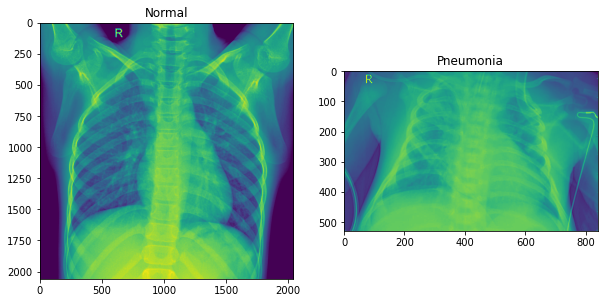

In [ ]:
print(len(os.listdir(train_n)))

#normal
n_pic = os.listdir(train_n)[0]
n_pic_address = train_n+n_pic
print('normal picture title: ',n_pic)

#Pneumonia
p_pic =  os.listdir(train_p)[0]
p_pic_address = train_p+p_pic
print('pneumonia picture title:', p_pic)

# Load the images
n_load = Image.open(n_pic_address)
p_load = Image.open(p_pic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(n_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(p_load)
a2.set_title('Pneumonia')

In [ ]:
#denseNet reference. https://www.kaggle.com/georgiisirotenko/pytorch-x-ray-transfer-learning-densenet


In [ ]:
import torchvision.transforms as transform
transformer = transform.Compose([transform.Resize(255),transform.CenterCrop(224),transform.ToTensor()])

# transform.RandomHorizontalFlip(),transform.RandomRotation(10),transform.RandomGrayscale(),transform.RandomAffine(translate=(0.05,0.05), degrees=0),

In [ ]:


# print(dataset.classes)
# print(len(dataset))

In [ ]:
from sklearn.model_selection import train_test_split

random_seed = 0
torch.manual_seed(random_seed);

train_batch_size = 30
test_batch_size = 30

trainset, testset = train_test_split(dataset, test_size=0.3, random_state=random_seed)
len(trainset), len(testset)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=True)

In [ ]:
# import torchvision.models.densenet161 as densenet161
import torchvision
dense161 = torchvision.models.densenet161(pretrained=True)

In [ ]:
import torch.optim as optim
import torch.nn as nn

#TODO : Use appropriate loss criterion and optimizer 

#Begin Your Code
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dense161.parameters()) #how to set up parameters for adam?

#End Your Code

In [ ]:
from sklearn.metrics import accuracy_score

epochs = 5

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        #TODO : Make predictions, calculate accuracy and update your weights once

        #Begin Your Code
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = dense161(inputs)
        loss = criterion(outputs, labels)
        predictions = torch.argmax(outputs, axis =1)
        accuracy = accuracy_score(labels, predictions)
        loss.backward()
        optimizer.step()

        #End Your Code

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('Epoch: %d, Batch: %5d, loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
            #Any thing that is added to the "info" gets plotted in tensorboard
            #TODO : Add the plots in Tensorboard to the report and explain what is happening
            info = {'loss' : loss.item(), 'accuracy': accuracy.item()}
            print(f"info:{info}")
            for tag, value in info.items():
                # logger.scalar_summary(tag, value, overall_step+1)
                logger.scalar_summary(tag, value, overall_step)
            overall_step += 1

print('Finished Training')

TypeError: ignored

#GoogLeNet

Library Sources
https://pytorch.org/hub/pytorch_vision_googlenet/
https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_googlenet.ipynb

Refereneces:
https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf
https://www.geeksforgeeks.org/understanding-googlenet-model-cnn-architecture/
https://towardsdatascience.com/deep-learning-googlenet-explained-de8861c82765